In [1]:
import sympy as sym

x, y, z = sym.symbols('x y z')
f = sym.Function('f')
type(f)

sympy.core.function.UndefinedFunction

In [2]:
f(x)

f(x)

In [3]:
f(x, y, z)

f(x, y, z)

In [4]:
g = sym.Function('g')(x, y, z)
g

g(x, y, z)

In [5]:
f.free_symbols, g.free_symbols

(set(), {x, y, z})

In [6]:
f_real = sym.Function('f', real=True)
f_real(x).is_real

True

In [7]:
f_simbolo = sym.Symbol('f', real=True)
f_real_herencia = sym.Function(f_simbolo)
f_real_herencia.is_real

True

In [8]:
type(sym.cos)

sympy.core.function.FunctionClass

In [9]:
sym.cos(sym.pi * 2)

1

In [10]:
n = sym.Symbol('n', integer=True, odd=True)
sym.cos(n * sym.pi)

-1

In [11]:
def f_py(x, y):
    return (x + y) ** 3

print(type(f_py))
f_py(x, y)

<class 'function'>


(x + y)**3

In [12]:
f_py(1, 2)

27

In [13]:
sym.expand(f_py(x, 3))

x**3 + 9*x**2 + 27*x + 27

In [14]:
h = sym.Lambda((x, y), (x + y) ** 2)
h

Lambda((x, y), (x + y)**2)

In [15]:
h(3, y)

(y + 3)**2

In [16]:
sym.limit(sym.sin(x) / x, x, 0)

1

In [17]:
f = x ** 3 - 3 * x
f.subs(x, sym.oo)

nan

In [18]:
sym.limit(f, x, sym.oo)

oo

In [19]:
f = sym.Function('f')
x, h = sym.symbols('x h')
cociente_incremental = (f(x + h) - f(x)) / h
sym.limit(cociente_incremental.subs(f, sym.sin), h, 0)

cos(x)

In [20]:
sym.limit(cociente_incremental.subs(f, sym.exp), h, 0)

exp(x)

In [21]:
derivada = sym.Limit(cociente_incremental, h, 0)
derivada

Limit((-f(x) + f(h + x))/h, h, 0, dir='+')

In [22]:
derivada.subs(f, sym.cos).doit()

-sin(x)

In [23]:
l_sup = sym.limit(1 / (x - 2), x, 2, '+')
l_inf = sym.limit(1 / (x - 2), x, 2, '-')
l_sup, l_inf

(oo, -oo)

In [24]:
sym.diff(sym.cos(x) ** 2, x) 

-2*sin(x)*cos(x)

In [25]:
expr = sym.cos(x) ** 2
expr.diff()

-2*sin(x)*cos(x)

In [26]:
sym.diff(sym.exp(x ** 2), x, x, x)

4*x*(2*x**2 + 3)*exp(x**2)

In [27]:
sym.diff(sym.exp(x ** 2), x, 3)

4*x*(2*x**2 + 3)*exp(x**2)

In [28]:
sym.diff(sym.exp(x * y * z), x, 2, y, y, z, 4)

x**2*y**2*(x**4*y**4*z**4 + 20*x**3*y**3*z**3 + 122*x**2*y**2*z**2 + 256*x*y*z + 144)*exp(x*y*z)

In [29]:
expresion = sym.hermite(x, 0)
expresion.diff(x)

2**x*sqrt(pi)*polygamma(0, 1/2 - x/2)/(2*gamma(1/2 - x/2)) + 2**x*sqrt(pi)*log(2)/gamma(1/2 - x/2)

In [30]:
derivada = sym.Derivative(sym.exp(x * y * z), x, 2, y, y, z, 4)
derivada

Derivative(exp(x*y*z), (x, 2), (y, 2), (z, 4))

In [31]:
derivada.doit()

x**2*y**2*(x**4*y**4*z**4 + 20*x**3*y**3*z**3 + 122*x**2*y**2*z**2 + 256*x*y*z + 144)*exp(x*y*z)

In [32]:
f, g = sym.symbols('f g', cls=sym.Function)
f(x).diff()

Derivative(f(x), x)

In [33]:
g(x, y, z).diff(x, x, y, 3)

Derivative(g(x, y, z), (x, 2), (y, 3))

In [34]:
f(x).diff(y)

0

In [35]:
ecdif = sym.Eq(f(x).diff(x, 2) - f(x), sym.sin(x))
ecdif

Eq(-f(x) + Derivative(f(x), (x, 2)), sin(x))

In [36]:
sym.dsolve(ecdif, f(x))

Eq(f(x), C1*exp(-x) + C2*exp(x) - sin(x)/2)

In [37]:
sym.integrate(sym.cos(x), x)

sin(x)

In [38]:
a, b = sym.symbols('a b')
sym.integrate(sym.cos(x), (x, a, b))

-sin(a) + sin(b)

In [39]:
sym.integrate(x ** x, x)

Integral(x**x, x)

In [40]:
integral = sym.Integral(sym.exp(-x ** 2 - y **2), (x, 0, sym.oo), (y, 0, sym.oo))
integral

Integral(exp(-x**2 - y**2), (x, 0, oo), (y, 0, oo))

In [41]:
integral.doit()

pi/4

In [42]:
integral_numérica = sym.integrate(sym.exp(-x ** 2 * abs(x-1)), (x, 0, sym.oo))
integral_numérica

Integral(exp(-x**2*Abs(x - 1)), (x, 0, oo))

In [43]:
integral_numérica.evalf()

1.322

In [44]:
x, y, t = sym.symbols('x y t', real=True)
C = sym.Curve([sym.E ** t + 1, sym.E ** t - 1], (t, 0, sym.ln(2)))
sym.line_integrate(x **2 + y ** 2, C, [x, y])

20*sqrt(2)/3

In [45]:
n = sym.symbols('n', integer=True)
S1 = sym.Sum((-1) ** n / (n + 1), (n, 0, sym.oo))
S1

Sum((-1)**n/(n + 1), (n, 0, oo))

In [46]:
S1.doit()

log(2)

In [47]:
S2 = sym.Sum(1 / n ** 2, (n, 1, sym.oo))
S2

Sum(n**(-2), (n, 1, oo))

In [48]:
S2.doit()

pi**2/6

In [49]:
S3 = sym.Sum(1 / n ** 4, (n, 1, 10))
S3

Sum(n**(-4), (n, 1, 10))

In [50]:
S3.doit()

43635917056897/40327580160000

In [51]:
S4 = sym.Sum(x ** n / sym.factorial(n), (n, 1, sym.oo))
S4.doit().simplify()

exp(x) - 1

In [52]:
P = sym.Product(1 / n, (n, 1, 10))
P

Product(1/n, (n, 1, 10))

In [53]:
P.doit()

1/3628800

In [54]:
W = sym.Product(2 * n/(2 * n - 1) * 2 * n / (2 * n + 1), (n, 1, sym.oo))
W.doit()

Product(4*n**2/((2*n - 1)*(2*n + 1)), (n, 1, oo))

In [55]:
m = sym.Symbol('m', integer=True, positive=True)
wallis = sym.Product(2 * n / (2 * n - 1) * 2 * n / (2 * n + 1), (n, 1, m))
WE = wallis.doit()
WE

4**m*factorial(m)**2/(2**(2*m)*RisingFactorial(1/2, m)*RisingFactorial(3/2, m))

In [56]:
sym.limit(WE, m, sym.oo)

pi/2

In [57]:
f = sym.cos(x)
f.series(n=10)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 + O(x**10)

In [58]:
sym.series(f, x0=sym.pi)

-1 + (x - pi)**2/2 - (x - pi)**4/24 + O((x - pi)**6, (x, pi))

In [59]:
f.series(n=10).removeO()

x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1

In [60]:
serie = f.series(n=None)
[next(serie) for i in range(7)]

[1, -x**2/2, x**4/24, -x**6/720, x**8/40320, -x**10/3628800, x**12/479001600]

In [61]:
f = x ** 2
g = x
Ff = sym.fourier_series(f, (x, -sym.pi, sym.pi))
Fg = sym.fourier_series(g, (x, -sym.pi, sym.pi))
Ff.truncate(n=5)

-4*cos(x) + cos(2*x) - 4*cos(3*x)/9 + cos(4*x)/4 + pi**2/3

In [62]:
Fg.truncate(n=4)

2*sin(x) - sin(2*x) + 2*sin(3*x)/3 - sin(4*x)/2

In [63]:
f = sym.sin(x) + sym.pi
f_numérico = f.evalf(subs={x:1})
print(f"f(1) = {f_numérico}")

f(1) = 3.98306363839769


In [64]:
f_preciso = f.evalf(50, subs={x:1})
print(f"f(1) = {f_preciso}")

f(1) = 3.9830636383976897451151457049098018838197324601735


In [65]:
sym.N(f.subs({x:1}), 50)

3.9830636383976897451151457049098018838197324601735

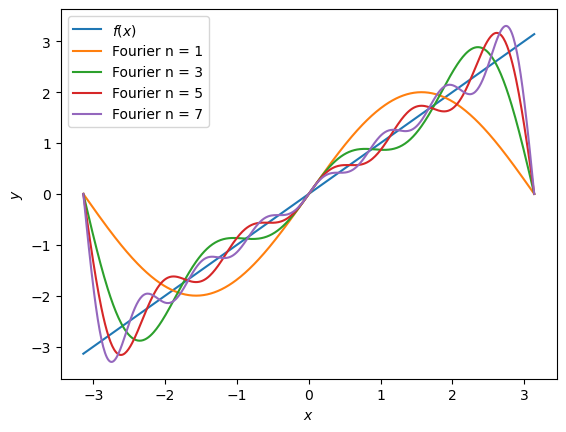

In [66]:
import matplotlib.pyplot as plt
import numpy as np
Fx = sym.fourier_series(x, (x, -sym.pi, sym.pi))
x_array = np.linspace(-np.pi, np.pi, 500)
plt.plot(x_array, x_array, label=r'$f(x)$')
for n in [1, 3, 5, 7]:
    F_trunc = Fx.truncate(n=n)
    F_numérica = sym.lambdify(x, F_trunc, modules='numpy')
    plt.plot(x_array, F_numérica(x_array), label=f"Fourier n = {n}")

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()    


### Copyright 2020-2025 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

